# **Hand Gesture Recognition using Deep Learning**

![Hand Gesture Recognition](https://techcrunch.com/wp-content/uploads/2019/08/handtracking_shot.png)


## Introduction
This notebook demonstrates the process of building a sophisticated deep learning model for hand gesture recognition. We'll utilize a comprehensive dataset of near-infrared images captured by the Leap Motion sensor to train and evaluate our model. This project aims to create an accurate and robust system capable of recognizing various hand gestures in real-time.

## Context
Hand gesture recognition is a crucial and rapidly evolving area within computer vision, with wide-ranging applications across multiple domains:

1. Human-Computer Interaction (HCI): Enabling more intuitive and natural ways for users to interact with digital devices and interfaces.
2. Sign Language Interpretation: Assisting in the translation and understanding of sign languages, potentially breaking down communication barriers.
3. Virtual and Augmented Reality: Enhancing immersive experiences by allowing users to interact with virtual objects using natural hand movements.
4. Robotics: Improving human-robot interaction by enabling robots to understand and respond to human gestures.
5. Automotive Industry: Developing gesture-controlled interfaces for in-car systems, enhancing driver safety and convenience.

This project leverages a specialized database of hand gesture images acquired by the Leap Motion sensor, known for its high precision in tracking hand and finger movements.

## Content
The database used in this project is comprehensive and diverse, consisting of:

- 10 distinct hand gestures: This variety allows our model to learn a wide range of hand positions and shapes, making it more versatile in real-world applications.
- Performed by 10 different subjects (5 men and 5 women): This diversity in subjects helps to ensure that our model can generalize well across different hand sizes, shapes, and skin tones.
- Near-infrared images captured by the Leap Motion sensor: These images provide detailed information about hand structure and positioning, even in low-light conditions, thanks to the near-infrared technology.

## Notebook Structure

Throughout this notebook, we'll go through the following key steps:
1. Data Exploration: We'll analyze the dataset structure, visualize sample images, and gain insights into the distribution of gestures and subjects.
2. Data Preprocessing: This step involves resizing images, normalizing pixel values, and preparing the data for input into our deep learning model.
3. Model Architecture: We'll design and implement a convolutional neural network (CNN) tailored for hand gesture recognition.
4. Model Training: The process of training our model on the prepared dataset, including techniques like data augmentation to improve generalization.
5. Model Evaluation: We'll assess the model's performance using various metrics and visualization techniques.
6. Inference and Testing: Finally, we'll use our trained model to make predictions on new, unseen hand gesture images.


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

## Data Exploration


In [7]:
# paths for dataset
data_path = r"C:\Users\Hamad\Desktop\DataScience and AI 6 Months Mentorship\PRODIGY_ML\Prodigy_ML_04\HandGesture\images"


In [8]:
Name=[]
for file in os.listdir(data_path):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']
10


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
File=[]
for file in os.listdir(data_path):
    File+=[file]
    print(file)

call_me
fingers_crossed
okay
paper
peace
rock
rock_on
scissor
thumbs
up


## Data Preprocessing


In [12]:
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(data_path,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), color_mode='rgb', target_size=(60,60))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

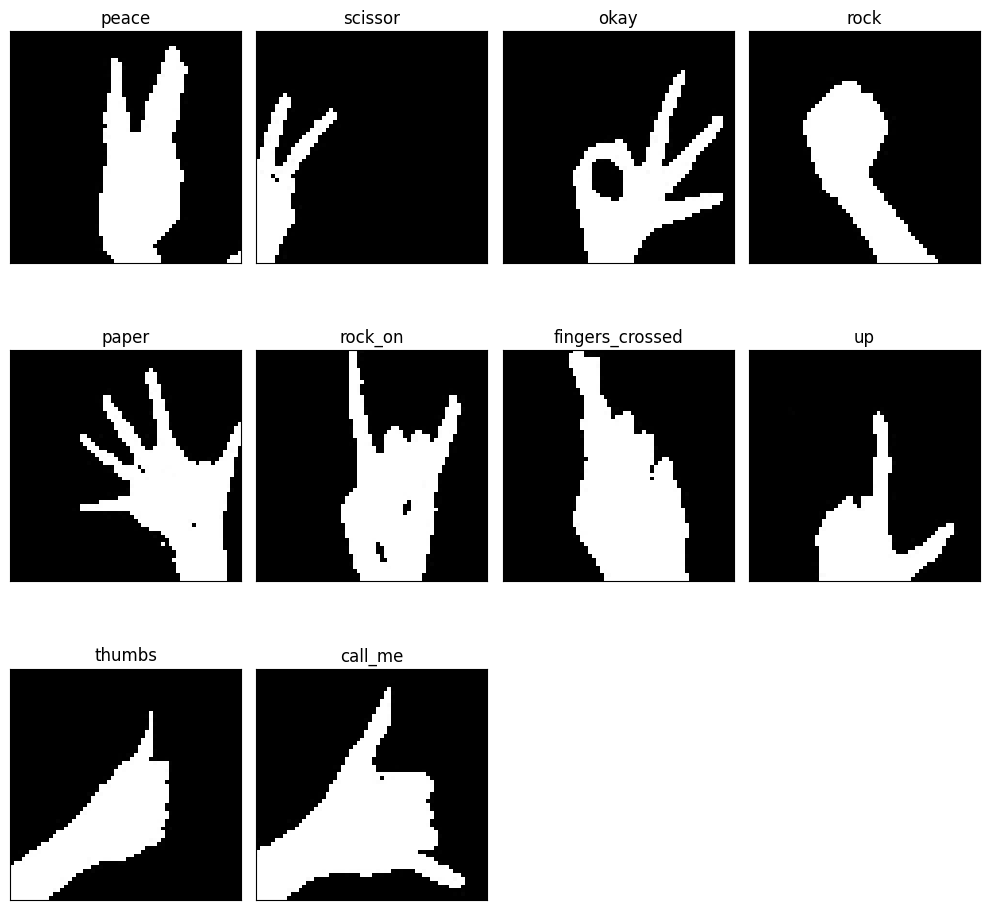

In [13]:
plt.figure(figsize=(10, 10))
for i, category in enumerate(set(reverse_mapping.values())):
    plt.subplot(3, 4, i+1)
    category_images = [img for img, lbl in dataset if reverse_mapping[lbl] == category]
    if category_images:
        plt.imshow(category_images[0], cmap='hot')
        plt.xticks([])
        plt.yticks([])
        plt.title(category)
plt.tight_layout()
plt.show()

## Model Architecture


In [14]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [15]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [16]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [49]:
X_train,X_test,y_train,y_test =train_test_split(data,labels,test_size=0.2,random_state=44)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 60, 60, 3)
(800, 60, 60, 3)
(3200, 10)
(800, 10)


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Model Training


In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.3790 - loss: 1.7444 - val_accuracy: 0.8288 - val_loss: 0.5763
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - accuracy: 0.8966 - loss: 0.3565 - val_accuracy: 0.9350 - val_loss: 0.2403
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.9420 - loss: 0.1678 - val_accuracy: 0.9525 - val_loss: 0.1907
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - accuracy: 0.9784 - loss: 0.0619 - val_accuracy: 0.9600 - val_loss: 0.1772
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - accuracy: 0.9834 - loss: 0.0565 - val_accuracy: 0.9475 - val_loss: 0.2470
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.9588 - val_loss: 0.1699
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.9945 - loss: 0.0154 - val_accuracy: 0.9762 - val_loss: 0.1074
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.9919 - loss: 0

## Model Evaluation


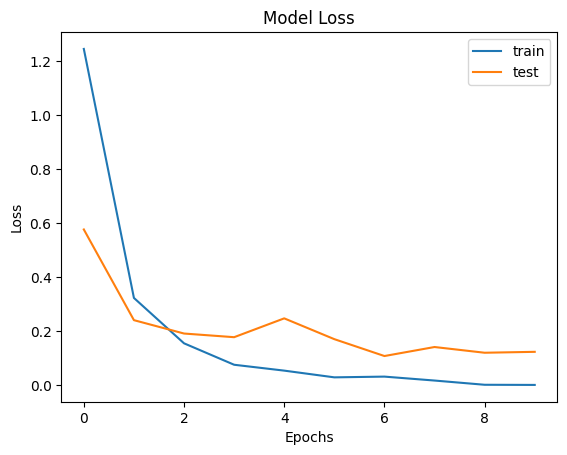

In [26]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

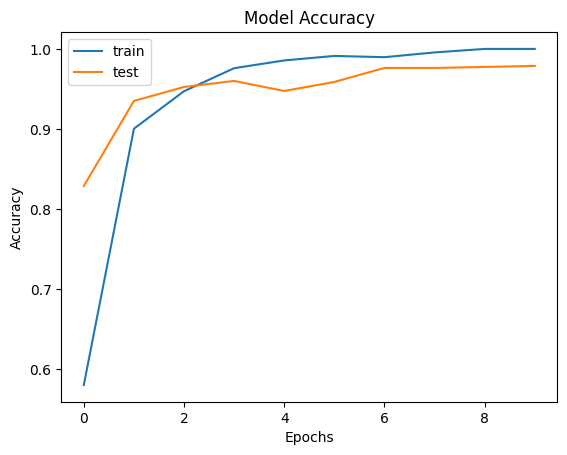

In [27]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9781 - loss: 0.1070
Test accuracy: 97.87%


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


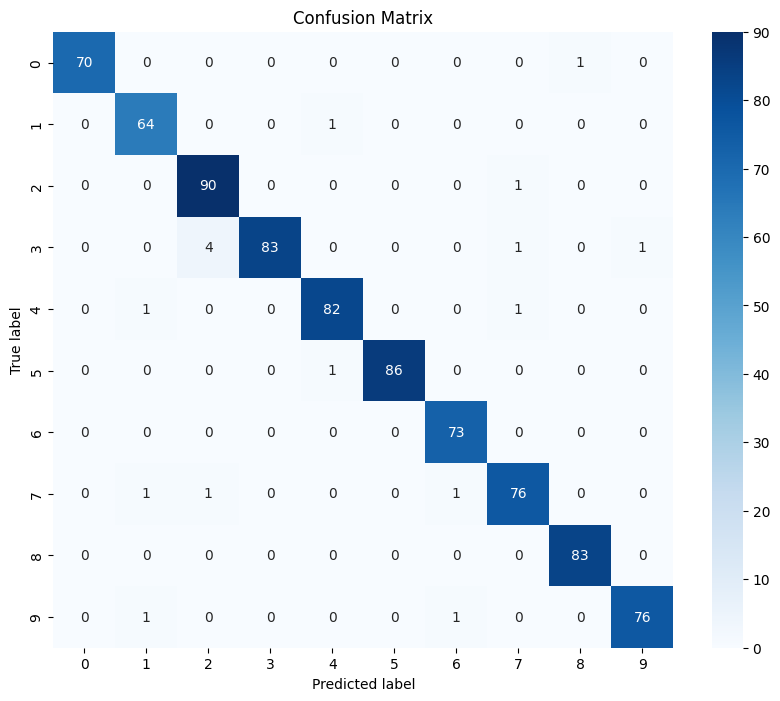

                 precision    recall  f1-score   support

        call_me       1.00      0.99      0.99        71
fingers_crossed       0.96      0.98      0.97        65
           okay       0.95      0.99      0.97        91
          paper       1.00      0.93      0.97        89
          peace       0.98      0.98      0.98        84
           rock       1.00      0.99      0.99        87
        rock_on       0.97      1.00      0.99        73
        scissor       0.96      0.96      0.96        79
         thumbs       0.99      1.00      0.99        83
             up       0.99      0.97      0.98        78

       accuracy                           0.98       800
      macro avg       0.98      0.98      0.98       800
   weighted avg       0.98      0.98      0.98       800



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=list(reverse_mapping.values())))

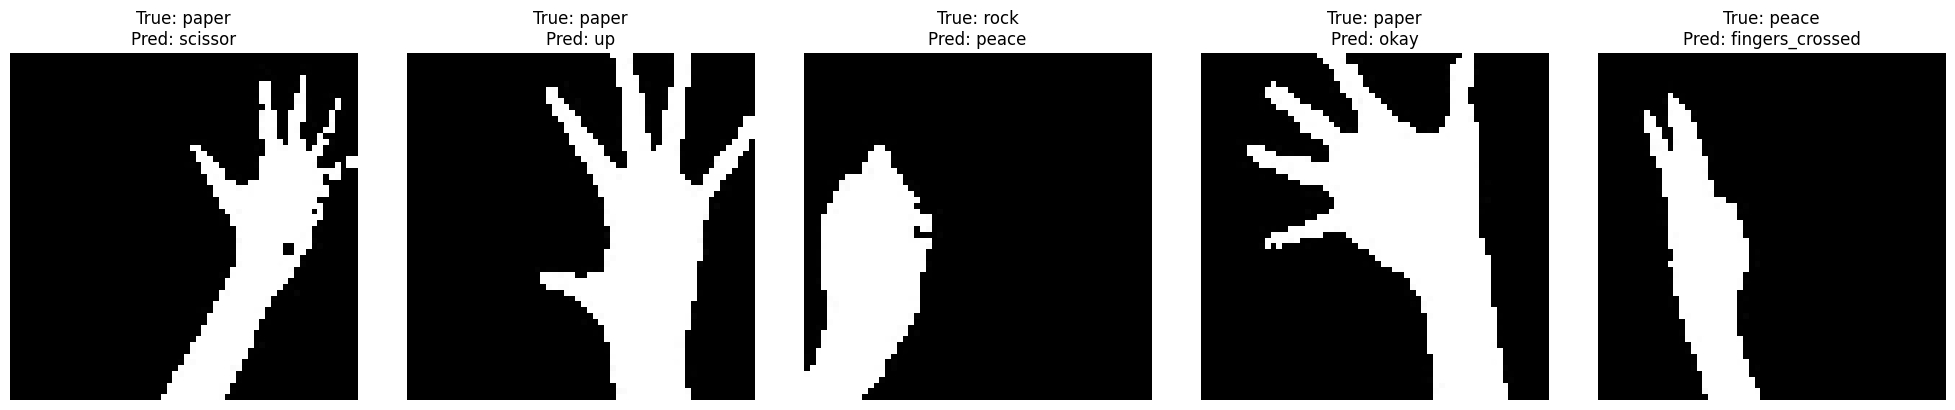

In [35]:
misclassified_indices = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(20, 4))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(60, 60, 3))
    plt.title(f"True: {mapper(y_true[idx])}\nPred: {mapper(y_pred_classes[idx])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Original class: call_me
Predicted class: call_me
Confidence: 0.97


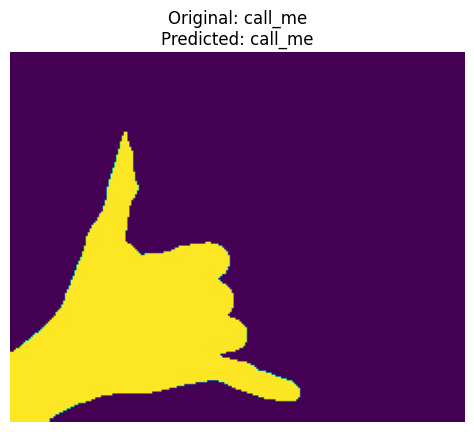

In [46]:
from PIL import Image
import numpy as np
import tensorflow as tf
import os

def predict_image(image_path, model, mapper):
    # Open the image using PIL
    img = Image.open(image_path)
    
    # Resize the image to match the input size of our model (60x60)
    img = img.resize((60, 60))
    
    # Convert the image to a numpy array and normalize
    img_array = np.array(img) / 255.0
    
    # Add a batch dimension and channel dimension
    img_array = np.expand_dims(img_array, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    
    # Repeat the single channel to create 3 channels
    img_array = np.repeat(img_array, 3, axis=-1)
    
    # Convert to TensorFlow tensor
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    
    # Make prediction
    prediction = model(img_tensor, training=False)
    predicted_class = tf.argmax(prediction, axis=1)[0]
    
    # Get the class name
    predicted_label = mapper(predicted_class.numpy())
    
    return predicted_label, prediction[0][predicted_class].numpy()


image_path = r'C:\Users\Hamad\Desktop\DataScience and AI 6 Months Mentorship\PRODIGY_ML\Prodigy_ML_04\HandGesture\images\call_me\768.jpg'  # Replace with the path to your image
predicted_label, confidence = predict_image(image_path, model, mapper)

# Get the original class from the image path
original_class = os.path.basename(os.path.dirname(image_path))

print(f"Original class: {original_class}")
print(f"Predicted class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

# Optionally, display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Original: {original_class}\nPredicted: {predicted_label}")
plt.axis('off')
plt.show()


Original class: rock_on
Predicted class: rock_on
Confidence: 1.00


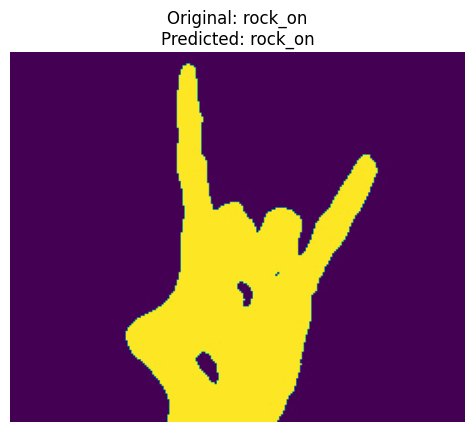

In [47]:
image_path = r'C:\Users\Hamad\Desktop\DataScience and AI 6 Months Mentorship\PRODIGY_ML\Prodigy_ML_04\HandGesture\images\rock_on\462.jpg'  # Replace with the path to your image
predicted_label, confidence = predict_image(image_path, model, mapper)

# Get the original class from the image path
original_class = os.path.basename(os.path.dirname(image_path))

print(f"Original class: {original_class}")
print(f"Predicted class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

# Optionally, display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Original: {original_class}\nPredicted: {predicted_label}")
plt.axis('off')
plt.show()

Original class: thumbs
Predicted class: thumbs
Confidence: 1.00


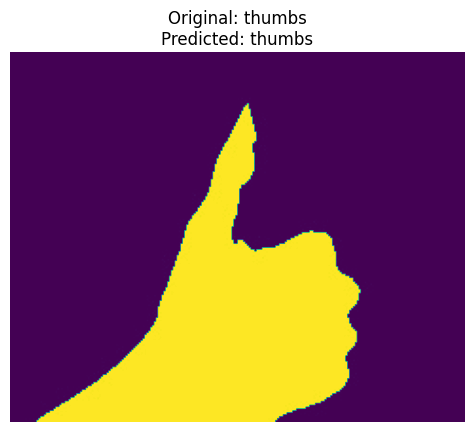

In [48]:
image_path = r'C:\Users\Hamad\Desktop\DataScience and AI 6 Months Mentorship\PRODIGY_ML\Prodigy_ML_04\HandGesture\images\thumbs\170.jpg'  # Replace with the path to your image
predicted_label, confidence = predict_image(image_path, model, mapper)

# Get the original class from the image path
original_class = os.path.basename(os.path.dirname(image_path))

print(f"Original class: {original_class}")
print(f"Predicted class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

# Optionally, display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Original: {original_class}\nPredicted: {predicted_label}")
plt.axis('off')
plt.show()